In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (epd.read_csv)

<a id='1'></a>
# 1. Important Libraries and Config

In [ ]:
!pip install langdetect # Language Detection
!pip install bnlp_toolkit # For Bangla Word Cloud
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf # Bangla Font For the Word Cloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=2631b7eaab6732346c9e5c21f09a019a8d18cfb67c99c66a5446c5c7c506c908
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 85.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=b43c7b86ac65e0ea1cd7fab4b04f035e6e828949a1dc216e4ee0189583b44955
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74

In [ ]:
from IPython.display import Markdown, display

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import re

def printmd(string):
  display(Markdown(string))

from langdetect import detect
import unicodedata
import html

import warnings
warnings. filterwarnings('ignore')

<a id='2'></a>
# 2. Descriptive Analysis
---

<a id='2.1'></a>
## 2.1 Preview of Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving restaurants.csv to restaurants.csv


In [ ]:
restaurant_df = pd.read_csv("restaurants.csv", encoding='utf-8')
restaurant_df

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,NaN,"Unnamed Road, Kawkhali, Bangladesh"
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,NaN,"Kawkhali bowlakanda, কাউখালি, Bangladesh"
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,NaN,"Charkhali - Mathbaria – Patharghata Rd, Mathba..."
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,NaN,"সদর রোড, Mathbaria, Bangladesh"
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,NaN,"7XP5+P69, Mathbaria, Bangladesh"
...,...,...,...,...,...,...,...,...
12698,ChIJJWgjO1vv-zkRZHwtUZQGu5I,Matir Manus,24.374515,88.604166,0.0,NaN,NaN,"BSCIC,Industrial Area,Sopura Rajshahi, রাজশাহী..."
12699,ChIJiRR5BQbv-zkR5DYjeHQF2l8,NR Home Kitchen,24.373602,88.600796,5.0,1.0,NaN,"Ward-13, Rajshahi, Bangladesh"
12700,ChIJB-JYPK3v-zkRzte9zqVK9vY,Bindu Hotel And Restaurant,24.374020,88.603169,3.8,689.0,1.0,"Station Rd, Rajshahi 6000, Bangladesh"
12701,ChIJTVZsObPv-zkRc6h1tV7FzXI,Mostak Hotel & Restaurant,24.374332,88.608138,0.0,NaN,NaN,"Dhaka Bus Terminal, Seroil, Rajshahi, Bangladesh"


<a id='2.2'></a>
## 2.2 Summary of Data

In [ ]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12703 entries, 0 to 12702
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   place_id           12703 non-null  object 
 1   name               12703 non-null  object 
 2   latitude           12703 non-null  float64
 3   longitude          12703 non-null  float64
 4   rating             12702 non-null  float64
 5   number_of_reviews  10037 non-null  float64
 6   affluence          1770 non-null   float64
 7   address            12703 non-null  object 
dtypes: float64(5), object(3)
memory usage: 794.1+ KB


In [ ]:
restaurant_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,12703.0,23.781365,0.986665,20.856284,23.106565,23.751747,24.387814,26.494126
longitude,12703.0,90.328629,0.984722,88.128098,89.584881,90.386950,90.877606,92.438711
rating,12702.0,3.226555,1.785468,0.000000,3.000000,4.000000,4.300000,5.000000
number_of_reviews,10037.0,205.763176,801.054157,1.000000,2.000000,10.000000,82.000000,17655.000000
affluence,1770.0,1.879661,0.558286,1.000000,2.000000,2.000000,2.000000,4.000000


<a id='2.3'></a>
## 2.3 Check for Duplicate Values

In [ ]:
dup = restaurant_df.duplicated().sum()
printmd(f"### There are {dup} duplicated rows present")

### There are 1945 duplicated rows present

In [ ]:
printmd("### Removed the Duplicated Rows ")
restaurant_df.drop_duplicates(keep="first", inplace=True)
restaurant_df.head(10)

### Removed the Duplicated Rows 

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,NaN,"Unnamed Road, Kawkhali, Bangladesh"
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,NaN,"Kawkhali bowlakanda, কাউখালি, Bangladesh"
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,NaN,"Charkhali - Mathbaria – Patharghata Rd, Mathba..."
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,NaN,"সদর রোড, Mathbaria, Bangladesh"
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,NaN,"7XP5+P69, Mathbaria, Bangladesh"
5,ChIJl5juNccLADoR3BsWokNpaqI,Sharif food fair,22.289866,89.959118,5.0,2.0,NaN,"7XQ5+WJX, Mathbaria, Bangladesh"
6,ChIJp86_kSELADoRScVyhurEYd0,সোহেল রানা কাটোল ফাম,22.293492,89.962316,5.0,1.0,NaN,"College Rd, Mathbaria, Bangladesh"
7,ChIJSXAxQMULADoRZEC5ZZ-H6eE,মেসার্স সৌখিন ষ্টীল এন্ড পার্টেক্স ফার্নিচার,22.285984,89.957330,0.0,NaN,NaN,"7XP4+9WW, Mathbaria, Bangladesh"
8,ChIJifhq1nkLADoR0H35zX9LbAE,বাইতুস সালাম ইসলামিয়া মাদ্রাসা,22.292394,89.965593,4.5,2.0,NaN,"Sabujnajar Rd, Mathbaria, Bangladesh"
9,ChIJy-BJw8QLADoRij4gTsZ8b2w,গৌরি হিন্দু হোটেল,22.286887,89.957305,0.0,NaN,NaN,"Sadar Road, Mathbaria, Bangladesh"


<a id='2.4'></a>
## 2.4 Check for Missing Values

In [ ]:
def missing_value_describe(data):
    # check missing values in the data
    total = data.isna().sum().sort_values(ascending=False)
    missing_value_pct_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_pct_stats > 0)

    # missing_value_stats = missing_value_pct_stats.sort_values(ascending=False)[:missing_value_col_count]
    missing_data = pd.concat([total, missing_value_pct_stats], axis=1, keys=['Total', 'Percent'])

    rows = data.isna().any(axis = 1).sum()
    cols = missing_value_col_count
    printmd(f"#### Number of rows with at least 1 missing values: {rows}")
    printmd(f"#### Number of columns with missing values: {cols}")

    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        printmd("##### Missing percentage (desceding):")
        display(missing_data[:missing_value_col_count])
    else:
        print("No missing data!!!")

# pass a dataframe to the function
missing_value_describe(restaurant_df)

#### Number of rows with at least 1 missing values: 9733

#### Number of columns with missing values: 3

##### Missing percentage (desceding):

,Total,Percent
affluence,9730,90.444321
number_of_reviews,2536,23.573155
rating,1,0.009295


<a id='3'></a>
# 3. Data Preparation
---

<a id='3.1'></a>
## 3.1 Check Location

### Lets look into the addresses of the restaurants to check whether they are inside Bangladesh or not.

In [ ]:
restaurant_df[restaurant_df['address'].str.contains('Bangladesh')==False]

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
2249,ChIJM3pmh-oZUzcRxEj0i0X72NM,Juice🍹& Spice🌶,23.003974,91.729881,0.0,NaN,NaN,"2P3H+HXJ, Sabroom, Tripura 799145, India"
2252,ChIJ2dxRyT0ZUzcRVlumPmgbV3c,Pushpa fast food,23.000829,91.727325,4.7,9.0,NaN,"Pushpa fast food chotokhil Rd, opposite of bag..."
2258,ChIJi_nlqHcZUzcRKjNPd5Cctnk,Upalabdhi Food Plaza,23.002733,91.729778,3.5,4.0,NaN,"2P3H+3WR, Sabroom, Tripura 799145, India"
2264,ChIJAWkn0lsZUzcRI1rLiUVf23o,Sabroom New Bus Stand,23.009141,91.725767,4.5,2.0,NaN,"2P5G+M82, Sabroom, Tripura 799145, India"
6347,ChIJczRZgTMB-zkRgvpD1QO1Yt8,M/S. Prapty Caterer & NANDITA Biriyani House,24.959450,88.240887,2.0,3.0,NaN,"Aiho, West Bengal 732121, India"
...,...,...,...,...,...,...,...,...
8967,ChIJZxA1UjjTUTcRh4Rn0s1dzog,Corner Cafe,24.871413,92.359391,3.3,132.0,NaN,"V9C5+HQ6, Karimganj, Assam 788710, India"
8968,ChIJS34qNcrTUTcRnUTJMI3uwL0,Hotel City View,24.869049,92.364834,3.8,5.0,NaN,"Main Road, opp. Congress Office, Karimganj, As..."
8969,ChIJw27U4zvTUTcRx5sfB5fjcPU,Mamoni Hotel,24.869008,92.356553,3.2,34.0,NaN,"Circuit House Rd, Karimganj, Assam 788710, India"
8970,ChIJ7WS_-EPTUTcRmnPXC2fm4W4,Ahar Hotel And Aheli Restaurant,24.867414,92.366639,3.6,250.0,NaN,"Shiv Bari Rd, Near Shib Mandir, Karimganj, Ass..."


### Looks like there are some restaurants that not in Bangladesh. We shall remove such restaurants and prepare a new dataframe for further investigations

In [ ]:
bd_rest_df = restaurant_df[restaurant_df['address'].str.contains('Bangladesh')==True]
bd_rest_df.reset_index(drop=True, inplace=True)
bd_rest_df

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,NaN,"Unnamed Road, Kawkhali, Bangladesh"
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,NaN,"Kawkhali bowlakanda, কাউখালি, Bangladesh"
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,NaN,"Charkhali - Mathbaria – Patharghata Rd, Mathba..."
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,NaN,"সদর রোড, Mathbaria, Bangladesh"
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,NaN,"7XP5+P69, Mathbaria, Bangladesh"
...,...,...,...,...,...,...,...,...
10691,ChIJU1_H2oDv-zkRCOJbwWLY5mc,Green castle,24.374087,88.600196,4.0,5.0,NaN,Bir Sreshtho Shaheed Captain Mohiuddin Jahangi...
10692,ChIJJWgjO1vv-zkRZHwtUZQGu5I,Matir Manus,24.374515,88.604166,0.0,NaN,NaN,"BSCIC,Industrial Area,Sopura Rajshahi, রাজশাহী..."
10693,ChIJiRR5BQbv-zkR5DYjeHQF2l8,NR Home Kitchen,24.373602,88.600796,5.0,1.0,NaN,"Ward-13, Rajshahi, Bangladesh"
10694,ChIJB-JYPK3v-zkRzte9zqVK9vY,Bindu Hotel And Restaurant,24.374020,88.603169,3.8,689.0,1.0,"Station Rd, Rajshahi 6000, Bangladesh"


<a id='3.2'></a>
## 3.2 Convert Affluence Level

### For a better visualization, we will convert the afffluence levels from 1.0, 2.0, 3.0... to ``$, $$, $$$``

In [ ]:
bd_rest_df['affluence'] = bd_rest_df['affluence'].replace([1.0, 2.0, 3.0, 4.0],['$', '$$', '$$$', '$$$$'])
bd_rest_df[bd_rest_df['affluence'].notna()==True]

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
12,ChIJJwuMBKoLADoRcGUOid7tMUg,ক্যাফে আড্ডা মঠবাড়িয়া,22.286668,89.958363,3.9,165.0,$$,"7XP5+M89, Mathbaria, Bangladesh"
30,ChIJR6ppFA5RVTcR7vhuJ_FPWME,Touhid Tea Store,22.746173,90.103694,4.1,37.0,$,"Swarupkathi Bridge, Swarupkathi, Bangladesh"
81,ChIJkdicn2gBADoRZgU_lUomDDw,Hotel Rose Garden,22.578679,89.968584,3.8,81.0,$,"Post Office Rd, Pirojpur Pourashava, Bangladesh"
87,ChIJEyplIFEAADoRw_6MExFtfr8,Hotel Apyayon,22.579484,89.969643,3.5,31.0,$,"HXH9+QVR, Pirojpur Pourashava, Bangladesh"
92,ChIJIRrrteQJVDcRi_9mQMEBerA,Nawab Chinese Restaurant and Party Center,23.865913,91.206187,4.4,50.0,$,"Shahid Amir Hossen Road (1st floor, আখাউড়া, B..."
...,...,...,...,...,...,...,...,...
10669,ChIJ-daAjkXu-zkRKA09tfrQTSI,Party Point Thai and Chinese Restaurant,24.386058,88.608380,3.9,196.0,$$,"Ground floor,1st and 2nd Floor, B.G.B Gate Rif..."
10681,ChIJKx-b407u-zkR7VQuYVQ6ysk,Razia Chinese and Thai Restaurant,24.383917,88.607963,3.7,49.0,$$,"R685, Rajshahi 6203, Bangladesh"
10685,ChIJbUqeQkXu-zkRPx152Vjuq3w,Muskan Hotel And Restaurant,24.388027,88.606072,3.8,99.0,$,"Bisik Match Factory Moor, Sapura, Boalia, Rajs..."
10686,ChIJJ0af2v_u-zkRhBVjVemblw0,Mona Hotel & Restaurant,24.375834,88.593381,3.7,14.0,$,"9HGV+89J, Rajshahi, Bangladesh"


<a id='4'></a>
# 4. Visualizations
---

<a id='4.1'></a>
## 4.1 Popular Restaurant Names
### Looks like some of the names are in Bangla. Lets separate the restaurants' that have their names in Bangla.

In [ ]:
reg = re.compile(r'[a-zA-Z]')

bd_rest_df["name_type"] = bd_rest_df["name"].apply(lambda x: "English" if reg.match(x) else "Bangla")

en_bd_restaurant = bd_rest_df[bd_rest_df['name_type'] == "English"]
non_en_bd_restaurant = bd_rest_df[bd_rest_df['name_type'] == "Bangla"]

printmd("### Restaurants With English Name")
display(en_bd_restaurant)
printmd("### Restaurants With Bangla Name")
display(non_en_bd_restaurant)

### Restaurants With English Name

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address,name_type
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,NaN,"Unnamed Road, Kawkhali, Bangladesh",English
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,NaN,"Kawkhali bowlakanda, কাউখালি, Bangladesh",English
5,ChIJl5juNccLADoR3BsWokNpaqI,Sharif food fair,22.289866,89.959118,5.0,2.0,NaN,"7XQ5+WJX, Mathbaria, Bangladesh",English
11,ChIJt_UWBRYLADoRqifcKsEhxz0,Food Club The Caterer's,22.287912,89.958609,4.5,8.0,NaN,"Super Market Rd, Mathbaria, Bangladesh",English
13,ChIJWeoUewMLADoRccKHZc-7SBE,New Muslim Sweets & bekare,22.288718,89.958737,5.0,3.0,NaN,"7XQ5+FFQ, Mathbaria, Bangladesh",English
...,...,...,...,...,...,...,...,...,...
10690,ChIJnw3sikPv-zkRwUUqZpRSD_I,lead generation,24.374515,88.604166,0.0,NaN,NaN,"0258, রাজশাহী 4750, Bangladesh",English
10691,ChIJU1_H2oDv-zkRCOJbwWLY5mc,Green castle,24.374087,88.600196,4.0,5.0,NaN,Bir Sreshtho Shaheed Captain Mohiuddin Jahangi...,English
10692,ChIJJWgjO1vv-zkRZHwtUZQGu5I,Matir Manus,24.374515,88.604166,0.0,NaN,NaN,"BSCIC,Industrial Area,Sopura Rajshahi, রাজশাহী...",English
10693,ChIJiRR5BQbv-zkR5DYjeHQF2l8,NR Home Kitchen,24.373602,88.600796,5.0,1.0,NaN,"Ward-13, Rajshahi, Bangladesh",English


### Restaurants With Bangla Name

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address,name_type
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,NaN,"Charkhali - Mathbaria – Patharghata Rd, Mathba...",Bangla
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,NaN,"সদর রোড, Mathbaria, Bangladesh",Bangla
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,NaN,"7XP5+P69, Mathbaria, Bangladesh",Bangla
6,ChIJp86_kSELADoRScVyhurEYd0,সোহেল রানা কাটোল ফাম,22.293492,89.962316,5.0,1.0,NaN,"College Rd, Mathbaria, Bangladesh",Bangla
7,ChIJSXAxQMULADoRZEC5ZZ-H6eE,মেসার্স সৌখিন ষ্টীল এন্ড পার্টেক্স ফার্নিচার,22.285984,89.957330,0.0,NaN,NaN,"7XP4+9WW, Mathbaria, Bangladesh",Bangla
...,...,...,...,...,...,...,...,...,...
10661,ChIJKfJqB8fv-zkRpiGFP8f_luo,১৩ পার্বন,24.376295,88.622616,4.7,7.0,NaN,"9JGF+G29, Rajshahi, Bangladesh",Bangla
10667,ChIJC_iHYynv-zkR6wsVGfFyZKg,আহার্য - Aharjo,24.385239,88.626540,5.0,1.0,NaN,"117/6 Chawkpara, Rajshahi 6100, Bangladesh",Bangla
10676,ChIJMf07PBPu-zkRqYWn3_uZCU4,নিউ তৃপ্তি হোটেল এন্ড রেস্টুরেন্ট,24.407021,88.615485,4.0,101.0,NaN,"Nawdapara Bus Terminal, Rajshahi Bypass, Rajsh...",Bangla
10688,ChIJ7-eXNX7v-zkRS3JvHVd2HuE,সালমান বাংলা খাবার হোটেল / বাবুল বাংলা খাবার হ...,24.405724,88.592444,5.0,2.0,NaN,"Rajshahi Bypass, Rajshahi, Bangladesh",Bangla


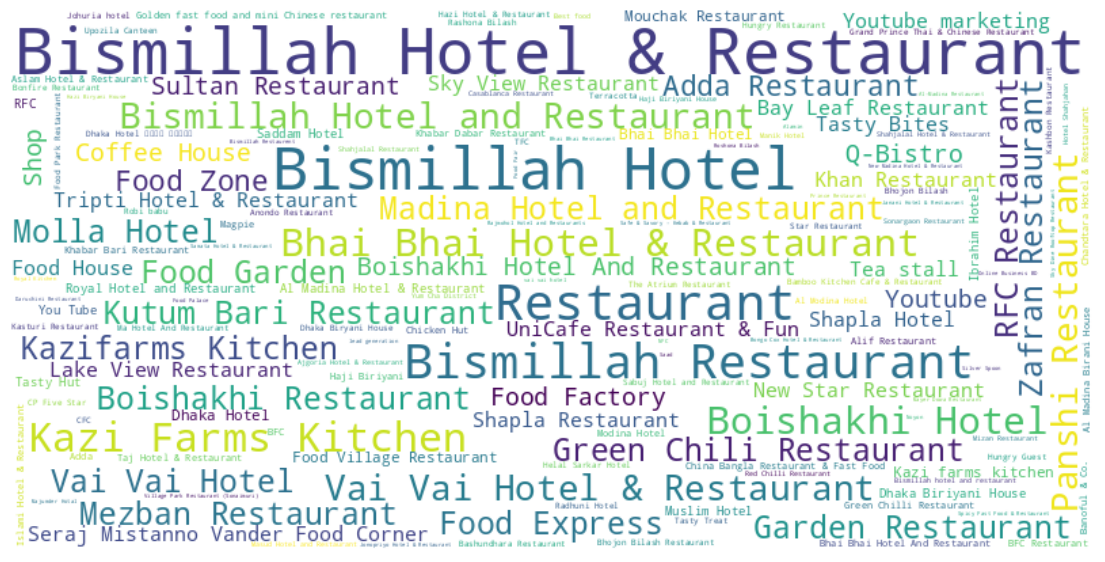

### These are the Most Frequently Used Restaurant Names in English

In [ ]:
data = en_bd_restaurant.name.value_counts().to_dict()

wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300).generate_from_frequencies(data)
plt.figure(figsize=(14,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
result = wc.to_file("English_word_cloud.png")
printmd("### These are the Most Frequently Used Restaurant Names in English")

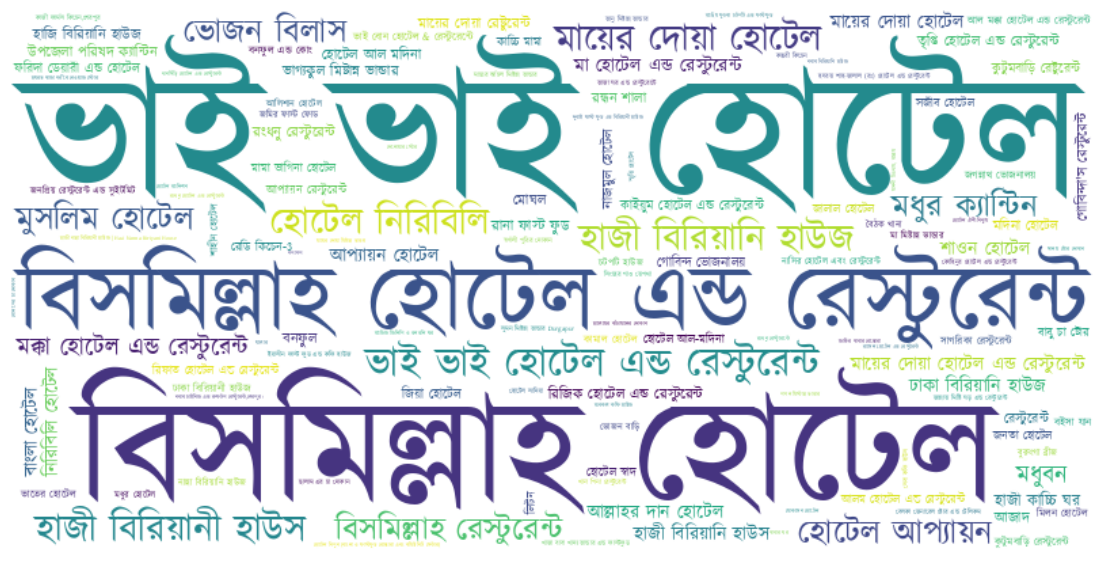

### These are the Most Frequently Used Restaurant Names in Bangla

In [ ]:
from bnlp.corpus import stopwords, punctuations
regex = r"[\u0980-\u09FF]+"
data = non_en_bd_restaurant.name.value_counts().to_dict()

wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300, font_path="./kalpurush.ttf", regexp=regex).generate_from_frequencies(data)
plt.figure(figsize=(14,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
result = wc.to_file("Bangla_word_cloud.png")
printmd("### These are the Most Frequently Used Restaurant Names in Bangla")

<a id='4.5'></a>
## 4.5 Expensive Restaurants with Ratings

In [ ]:
data = bd_rest_df[bd_rest_df['affluence'].notna()==True]
data_expensive = data[data['affluence'] == "$$$"]
data_expensive[['name','latitude', 'longitude', 'rating', 'number_of_reviews', 'affluence', 'address']]

,name,latitude,longitude,rating,number_of_reviews,affluence,address
2822,SERENE GARDEN Faridpur,23.595499,89.839921,4.2,545.0,$$$,"Khan Bahadur Ismail Rd, Faridpur, Bangladesh"
3799,The Grand Hall Restaurant & Convention,23.622235,90.500481,4.1,1601.0,$$$,"231/7 বঙ্গবন্ধু সড়ক, Chashara Hasnat Square (..."
8823,SEASONS Restaurant & Café,24.899916,91.874918,4.4,329.0,$$$,"Point, Bihongo, 25/A Kazitula Rd, Sylhet 3100,..."
8872,Spicy Restaurant & Party Center,24.895647,91.868174,4.0,987.0,$$$,"10th Floor, City Center, Zinda Bazar Point, Sy..."
8903,The Stubborn Goat,23.755775,90.374577,4.1,570.0,$$$,"House No. 05, Road No. 27 (Old, MIDAS Center, ..."
8972,Lake Terrace,23.869714,90.393387,4.0,2868.0,$$$,"House # 25/E, Lake Dr Rd, Dhaka 1230, Bangladesh"
9054,Izakaya,23.747540,90.369927,4.5,1116.0,$$$,"Green Rawshanara Tower (Level – 9) 755, Satmas..."
9093,The Green Lounge,23.745765,90.395321,4.3,3093.0,$$$,"18th Floor, Rupayan Trade Center, 114 Kazi Naz..."
9107,Lucknow Dhaka,23.793253,90.409183,4.2,1432.0,$$$,"E, 60 Kemal Ataturk Avenue, Dhaka 1213, Bangla..."
9117,Goong The Castle,23.797292,90.410445,4.4,537.0,$$$,"House no: 88, 12/B Rd No. 50, Dhaka 1212, Bang..."


### Looks like most Expensive restaurants are mainly located around Dhaka

<a id='4.6'></a>
## 4.6 Very Expensive Restaurants with Ratings

In [ ]:
data = bd_rest_df[bd_rest_df['affluence'].notna()==True]
data_very_expensive = data[data['affluence'] == "$$$$"]
data_very_expensive[['name', 'rating', 'number_of_reviews']]

,name,rating,number_of_reviews
984,Fanush Restaurant & Biriyani House,4.1,50.0
1683,Noman Fastfood,4.5,13.0
1689,Bhola Food Garden Restaurant,4.1,45.0
4596,Rayenda Bazar Ma Baba Hotel,3.6,29.0
4640,সততা ইললেক্ট্রনিক্স শরিফুল01987497501,3.9,35.0
5463,জ্যোতি হোটেল এন্ড রেস্টুরেন্ট,4.6,22.0
8410,Food Villa,4.0,161.0
9120,Chows,4.2,821.0
9353,Seasonal Tastes,4.5,294.0
9696,Farmhouse Burger,4.4,1501.0


<a id='5'></a>
# 5. Remarks
### The dataset may contain some anomalies such as Tea Stores or Food Stores that are also registered under Restaurant keyword. More extensive cleaning can be done to handle such issues in the future.